In [1]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
import getweather

def fillnans(array):
    x = np.arange(len(array))
    good = ~np.isnan(array)

    return np.interp(x, x[good], array[good])

In [3]:
hilo = getweather.getyear('HILO', ['TMIN','TMAX'], 2000)

Using ('USW00021504', 19.7192, -155.0531, 11.6, 'HI', 'HILO INTL AP', 'GSN', '', '91285').


In [4]:
hilo['TMIN'], hilo['TMAX'] = fillnans(hilo['TMIN']), fillnans(hilo['TMAX'])

In [5]:
np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMIN'])

(19.102739726027398, 14.4, 23.3)

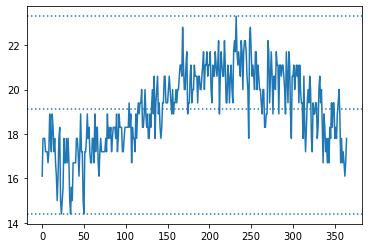

In [6]:
pp.plot(hilo['TMIN'])

# plot horizontal lines at mean, min, and max of TMIN data
for value in [np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMIN'])]:
    pp.axhline(value, linestyle=':')

In [9]:
mean, err = np.mean(hilo['TMIN']), math.sqrt(np.var(hilo['TMIN']))

In [10]:
rain = getweather.getyear('HILO', ['PRCP'], 2000)['PRCP']

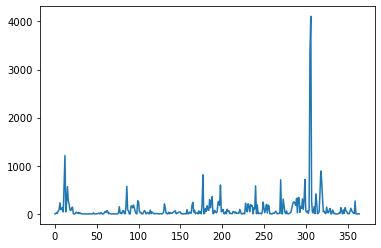

In [11]:
pp.plot(rain)

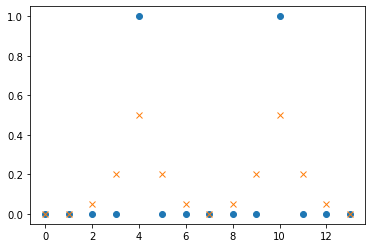

In [12]:
# show the effects of correlating a sparse vector
# with a triangular mask

x = np.array([0,0,0,0,1,0,0,0,0,0,1,0,0,0])

mask = np.array([0.05,0.2,0.5,0.2,0.05])
y = np.correlate(x, mask, 'same')

pp.plot(x, 'o')

pp.plot(y, 'x')